In [13]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd

In [14]:
df = pd.read_csv('messages.csv', nrows=10)
df.tail()

,subject,message,label
5,call for abstracts : optimality in syntactic t...,content - length : 4437 call for papers is the...,0
6,m . a . in scandinavian linguistics,m . a . in scandinavian linguistics at the uni...,0
7,call for papers : linguistics session of the m...,call for papers linguistics session - - midwes...,0
8,foreign language in commercials,content - length : 1937 greetings ! i ' m wond...,0
9,fulbright announcement : please post / dissemi...,fulbright announcement : please post / dissemi...,0


In [15]:
df.drop(columns=['subject'], inplace=True)
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   message  10 non-null     object
 1   label    10 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 292.0+ bytes


,message,label
0,content - length : 3386 apple-iss research cen...,0
1,"lang classification grimes , joseph e . and ba...",0
2,i am posting this inquiry for sergei atamas ( ...,0
3,a colleague and i are researching the differin...,0
4,earlier this morning i was on the phone with a...,0
5,content - length : 4437 call for papers is the...,0
6,m . a . in scandinavian linguistics at the uni...,0
7,call for papers linguistics session - - midwes...,0
8,content - length : 1937 greetings ! i ' m wond...,0
9,fulbright announcement : please post / dissemi...,0


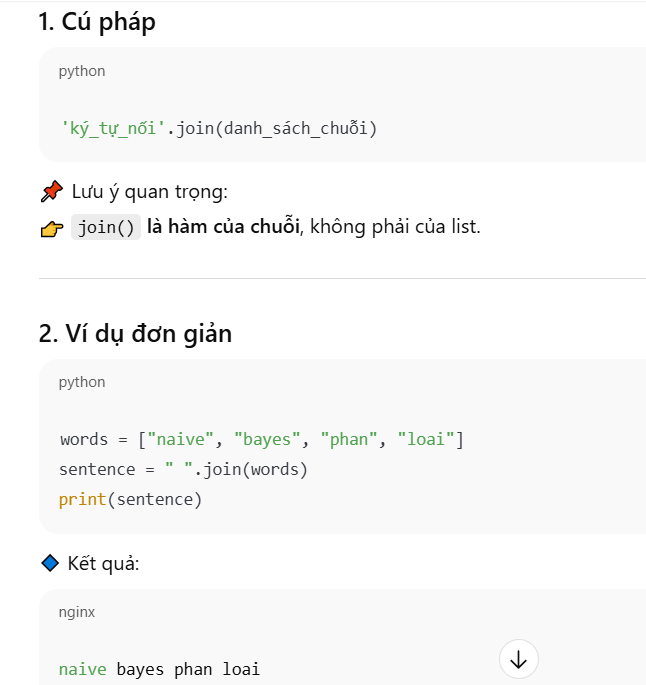

In [18]:
# convert to lowercase
df['cleaned_message'] = df['message'].str.lower()
df

,message,label,cleaned_message
0,content - length : 3386 apple-iss research cen...,0,content - length : 3386 apple-iss research cen...
1,"lang classification grimes , joseph e . and ba...",0,"lang classification grimes , joseph e . and ba..."
2,i am posting this inquiry for sergei atamas ( ...,0,i am posting this inquiry for sergei atamas ( ...
3,a colleague and i are researching the differin...,0,a colleague and i are researching the differin...
4,earlier this morning i was on the phone with a...,0,earlier this morning i was on the phone with a...
5,content - length : 4437 call for papers is the...,0,content - length : 4437 call for papers is the...
6,m . a . in scandinavian linguistics at the uni...,0,m . a . in scandinavian linguistics at the uni...
7,call for papers linguistics session - - midwes...,0,call for papers linguistics session - - midwes...
8,content - length : 1937 greetings ! i ' m wond...,0,content - length : 1937 greetings ! i ' m wond...
9,fulbright announcement : please post / dissemi...,0,fulbright announcement : please post / dissemi...


In [19]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

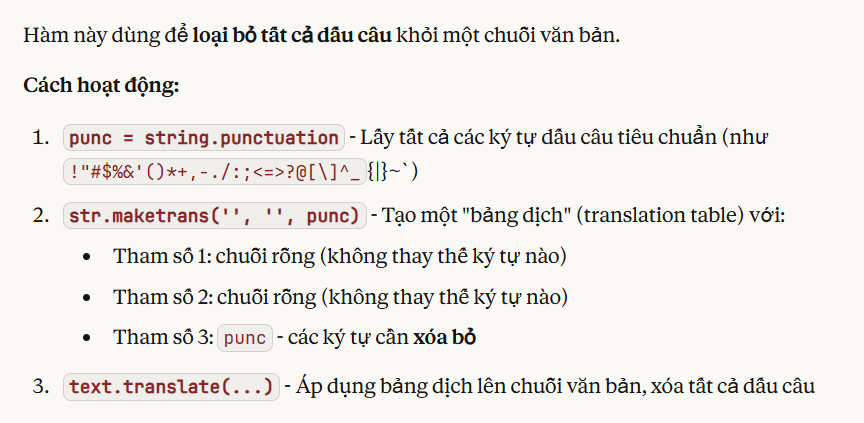

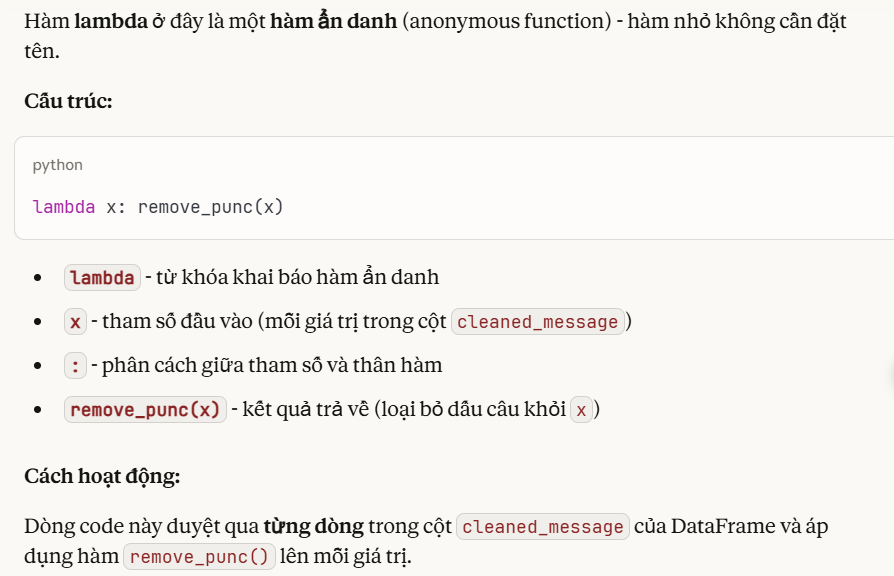

In [ ]:
# remove dấu câu (punctuations)
def remove_punc(text):
    punc = string.punctuation
    return text.translate(str.maketrans('', '', punc))

df["cleaned_message"] = df["message"].apply(remove_punc)
# or
# df["cleaned_message"] = df["message"].apply(lambda x: remove_punc(x))

df

,message,label,cleaned_message
0,content - length : 3386 apple-iss research cen...,0,content length 3386 appleiss research center...
1,"lang classification grimes , joseph e . and ba...",0,lang classification grimes joseph e and barb...
2,i am posting this inquiry for sergei atamas ( ...,0,i am posting this inquiry for sergei atamas s...
3,a colleague and i are researching the differin...,0,a colleague and i are researching the differin...
4,earlier this morning i was on the phone with a...,0,earlier this morning i was on the phone with a...
5,content - length : 4437 call for papers is the...,0,content length 4437 call for papers is the b...
6,m . a . in scandinavian linguistics at the uni...,0,m a in scandinavian linguistics at the unive...
7,call for papers linguistics session - - midwes...,0,call for papers linguistics session midwest ...
8,content - length : 1937 greetings ! i ' m wond...,0,content length 1937 greetings i m wonderin...
9,fulbright announcement : please post / dissemi...,0,fulbright announcement please post dissemina...


In [22]:
# remove stopword
from nltk.corpus import stopwords
", ".join(stopwords.words('english'))


"a, about, above, after, again, against, ain, all, am, an, and, any, are, aren, aren't, as, at, be, because, been, before, being, below, between, both, but, by, can, couldn, couldn't, d, did, didn, didn't, do, does, doesn, doesn't, doing, don, don't, down, during, each, few, for, from, further, had, hadn, hadn't, has, hasn, hasn't, have, haven, haven't, having, he, he'd, he'll, her, here, hers, herself, he's, him, himself, his, how, i, i'd, if, i'll, i'm, in, into, is, isn, isn't, it, it'd, it'll, it's, its, itself, i've, just, ll, m, ma, me, mightn, mightn't, more, most, mustn, mustn't, my, myself, needn, needn't, no, nor, not, now, o, of, off, on, once, only, or, other, our, ours, ourselves, out, over, own, re, s, same, shan, shan't, she, she'd, she'll, she's, should, shouldn, shouldn't, should've, so, some, such, t, than, that, that'll, the, their, theirs, them, themselves, then, there, these, they, they'd, they'll, they're, they've, this, those, through, to, too, under, until, up, 

In [27]:
STOPWORDS = set(stopwords.words('english'))
def remove_stopwords(texts):
    new_texts = []
    for text in texts:
        if text not in STOPWORDS:
            new_texts.append(text)
    text_final = ' '.join(new_texts)
    return text_final

def remove_stopwords_v2(text):
    return " ".join(
        [word for word in text.split() if word not in STOPWORDS]
    )

df['cleaned_message'] = df['cleaned_message'].apply(lambda x: remove_stopwords_v2(x))
df

,message,label,cleaned_message
0,content - length : 3386 apple-iss research cen...,0,content length 3386 appleiss research center u...
1,"lang classification grimes , joseph e . and ba...",0,lang classification grimes joseph e barbara f ...
2,i am posting this inquiry for sergei atamas ( ...,0,posting inquiry sergei atamas satamas umabnet ...
3,a colleague and i are researching the differin...,0,colleague researching differing degrees risk p...
4,earlier this morning i was on the phone with a...,0,earlier morning phone friend mine living south...
5,content - length : 4437 call for papers is the...,0,content length 4437 call papers best good enou...
6,m . a . in scandinavian linguistics at the uni...,0,scandinavian linguistics university tromsoe 19...
7,call for papers linguistics session - - midwes...,0,call papers linguistics session midwest modern...
8,content - length : 1937 greetings ! i ' m wond...,0,content length 1937 greetings wondering someon...
9,fulbright announcement : please post / dissemi...,0,fulbright announcement please post disseminate...
